### <p style="text-align: right;"> &#9989; Guangran Wang.</p>

---
<img src="https://i.ytimg.com/vi/t5RpOu1SEyA/maxresdefault.jpg" width=400px>
# Homework Assignment #3 (Individual)
## Reading and plotting unknown data formats

The purpose of this assignment is to give you the opportunity to test out some of the skills that you've developed in your prior programming courses and thus far this semester. In particular, you'll actually load and analyze some real astrophysical simulation data! The data that you'll work with is from a simulation of an "isolated galaxy", which means that it's a galaxy just sitting in the middle of a three dimensional domain all by itself. You should find that you actually have all of the skills necessary to look at this data and visualize it!

**You are encouraged to read through the entire assignment before you start to make sure you understand what you're expected to do.**

### Goals for this assignment:

By the end of this assignment, you should be able to:

* Load and explore HDF5 data files using Python
* Plot slices of three-dimensional data using matplotlib and array indexing
* Install a new package built for analyzing numerical simulation data
* Use a new package to visualize astrophysical simulation data

### Assignment instructions

**This assignment is due roughly two weeks from now at 11:59pm on Sunday, February 25th.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #3.  Submission instructions can be found at the end of the notebook.

### Grading

* Part 1: Setting up a repository and tracking changes (3 points)
* Part 2: Downloading the data (2 points)
* Part 3: Reading HDF5 data in Python (4 points)
* Part 4: Visualizing the data (4 points)
* Part 5: Computing a new field (3 points)
* Part 6: Visualizing the data with `yt` (6 points)

Total points: **22**

---
## Part 1: Setting up a repository for tracking changes (3 points)

Before you dive into the assignment, you need to set up a **private** GitHub repository that you will store this notebook in and track the changes as you make them. If you have issues creating a private repository, please contact your instructor. *You are not expected to pay money for a GitHub account*. You should request access to the [Student Pack](https://education.github.com/pack), if you haven't already. **If you end up creating public repository and you're asked to make it private, you will lose points for this section**.

For this section you should:

1. Set up a new, private Git repository on GitHub.
2. Clone the repository onto your computer.
3. Move this notebook into that repository and then add it and commit it to the repository and push the changes to the remote repository (**Suggestion**: You may want save and close this notebook before you move to the repository and then reopen it after you move it to make sure that you're working with the right copy of the notebook.)
4. Add your instructor and your TA as collaborators to your respository. For Section 001, you should add users "devinsilvia" and "haoyunin". For Section 002, you should add users "yangy5" and "haoyunin".

From this point on you will occasionally be asked to save the state of your notebook, commit the changes, and push it to your new repository.

**Note**: If you're struggling with getting the Git repository set up, you can always just work on the notebook as is and try to come back and figure out the repository component later, but you may lose some points though since you won't have periodic commits as you make progress along the way. Losing a few points is still better than not finishing the homework on time!

---
## Part 2: Downloading the data (2 points)

Depending on internet speeds, this could take a bit of time, try downloading the smaller data set first (some_data.h5; ~50MB) so that you can start working with that one while you wait for the larger one (some_more_data.h5; ~200MB) to download. Remember, in order do work with the data in this notebook, you'll need to make sure the data is in the same place as the notebook or you'll need to put the full path to the file in your data reading commands. **DO NOT** commit the data files to your repository! Adding large files to a repository means that those large files will have to be downloaded every time you want to clone a new version of the repository, which can be very time-consuming. You should not try to version control large datasets!

The first file is located here: http://devinsilvia.com/cmse202/some_data.h5

The second file is located here: http://devinsilvia.com/cmse202/some_more_data.h5

In the cell below, include the command line commands that you used to download the files (you can either run them on the command line or inside the jupyter notebook using the correct leading character). If you're not sure how to download them using the command line, download them however you need to in order to get them on to your computer and move on. Again, you'll lose some points for not figuring out the right commands, but it's better than not having the data to work with!

In [2]:
# Put your download commands here
curl http://devinsilvia.com/cmse202/some_data.h5
curl http://devinsilvia.com/cmse202/some_more_data.h5

SyntaxError: invalid syntax (<ipython-input-2-b30d683eb22c>, line 2)

---
## Part 3: Reading HDF5 data in Python (4 points)

You might notice that the files you downloaded have the extension ".h5". This might not be a file extension that you are particularly familiar with. These files are actually [HDF5](https://support.hdfgroup.org/HDF5/) files, which is a file format commonly used in high performance computing as it offers a number of advantages over raw binary files and, not surprisingly, ASCII-based formats. One useful advantage is that the data is self-describing. That means that the contents of the file are included within the file itself through the creation of "Groups" and "Datasets" that have particular names.

However, we've never opened such files in class! Your first task is to figure out how to open and read the files using Python. Is there a package that exists that can do this for you? Is the package already a part of your Anaconda distribution? If so, great! If not, perhaps you'll have to install a new package. As any good computational scientists would, make sure to check if it's already available in your Python distribution before you go through the hassle of installing something.

For this part, you need to do the following:

1. **Open/read "some_data.h5" using an appropriate Python package**. This is the smaller dataset and is a pretty basic HDF5 file. You'll try opening "some_more_data.h5" later on in the exam, so don't worry about it right now. Write the code necessary to open/read the file.
2. Once you've read in the file, you need to figure out what information it contains. There are three different variables stored in the dataset. One of them is called "density", what are the other two? Not surprisingly, since this is an astrophysical simulation the dataset includes information about the gas contained within the simulation domain. **Include some code that prints out the names of the variables in the dataset**. We often refer to these as "fields" when thinking about simulation data.
3. What is the shape of the dataset? You've already been told it's three-dimensional data, but how many values are there in each dimension? Again, **write some code that prints out this information**.

In [56]:
# Put your code here
import h5py 
import numpy as np
filename = 'some_data.h5'
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" , list(f.keys()))
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

len(data)
data

Keys: %s ['density', 'metallicity', 'temperature']


[array([[  1.57093184e-27,   1.57093184e-27,   1.57093184e-27, ...,
           1.61094479e-27,   1.61094479e-27,   1.61094479e-27],
        [  1.57093184e-27,   1.57093184e-27,   1.57093184e-27, ...,
           1.61094479e-27,   1.61094479e-27,   1.61094479e-27],
        [  1.57093184e-27,   1.57093184e-27,   1.57093184e-27, ...,
           1.61094479e-27,   1.61094479e-27,   1.61094479e-27],
        ..., 
        [  1.54782115e-27,   1.54782115e-27,   1.54782115e-27, ...,
           1.40704115e-27,   1.40704115e-27,   1.40704115e-27],
        [  1.54782115e-27,   1.54782115e-27,   1.54782115e-27, ...,
           1.40704115e-27,   1.40704115e-27,   1.40704115e-27],
        [  1.54782115e-27,   1.54782115e-27,   1.54782115e-27, ...,
           1.40704115e-27,   1.40704115e-27,   1.40704115e-27]]),
 array([[  1.57093184e-27,   1.57093184e-27,   1.57093184e-27, ...,
           1.61094479e-27,   1.61094479e-27,   1.61094479e-27],
        [  1.57093184e-27,   1.57093184e-27,   1.57093184e-2

---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 3".
---

## Part 4: Visualizing the data (4 points)

Now that you've read the data into your notebook, the next thing we want to try to do is to visualize it. The easiest thing to do is to try to just take some slices through the three dimensional dataset to try to get a sense for the structure of the gas in the simulation.

For this section:

1. Using matplotlib, **take a 2D slice though the center of the domain and make a plot of the "density" field for each 2D cartesian plane** (i.e. the x-y plane, the x-z plane, and the y-z plane). You should be able to accomplish this by using NumPy style indexing of the 3D grid of data. Add a colorbar to the plot and label the colorbar to indicate which field it is.
2. Do the same thing again, but this time **plot the log of the density values**. Again, make sure these plots have a colorbar.
3. **Choose one of the other two fields in the dataset and make 3 more slice plots through the center of the simulation**. These should also have a colorbar, but since it's a different field, choose a different colormap.

You should find that when you make these plots, you see a galactic disk sitting in the middle of the simulation. Two of your 2D planes will show you an edge-on disk and one of them will show you a face-on disk. The gas around the disk is part of what we call the galactic halo or the "circumgalactic medium". One of your plots might look something like this (note that the vertical band in the middle is the disk of the galaxy):

<img src="https://i.imgur.com/581tCCA.png" width=400px>

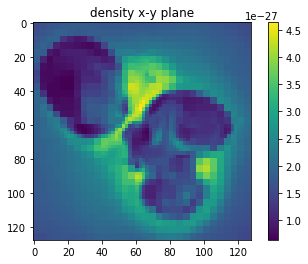

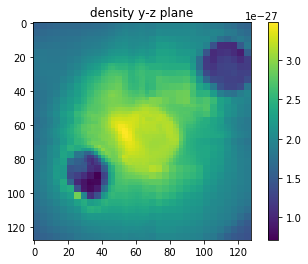

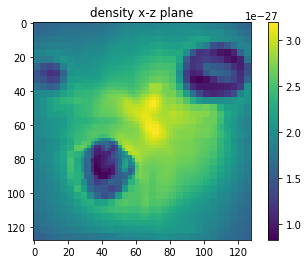

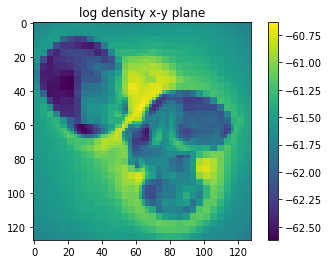

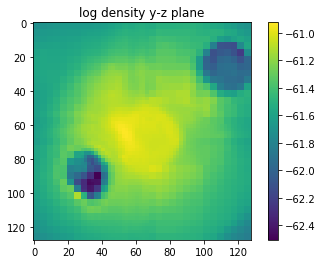

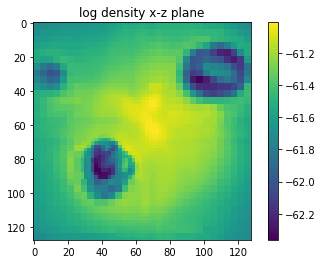

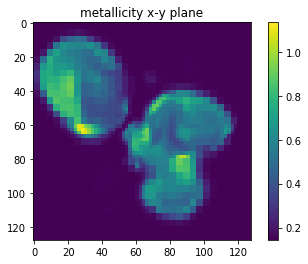

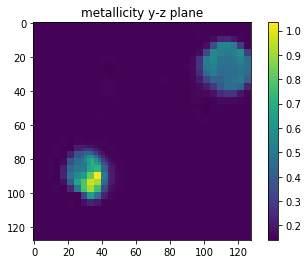

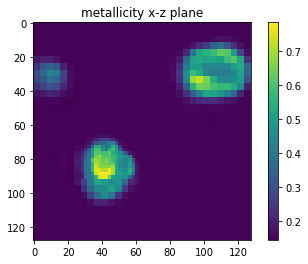

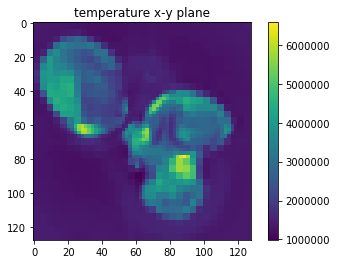

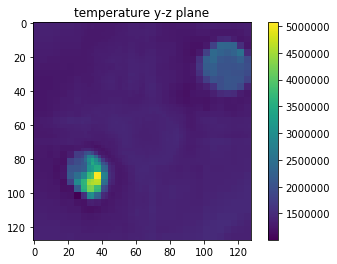

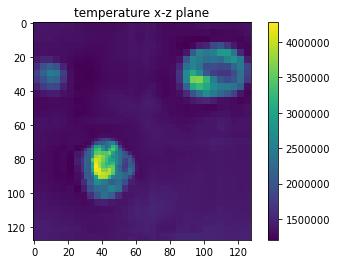

In [109]:
# Put your code here
%matplotlib inline
import matplotlib.pyplot as plt
import math


density = list(f["density"])
xy=np.zeros((128,128))
yz=np.zeros((128,128))
xz=np.zeros((128,128))

for i in range (len(density)):
    for j in range (len(density)):
        xy[i][j] = density[i][j][0]
for i in range (len(density)):
    for j in range (len(density)):
        yz[i][j] = density[0][i][j]
for i in range (len(density)):
    for j in range (len(density)):
        xz[i][j] = density[i][0][j]
plt.title("density x-y plane")
plt.imshow(xy)
plt.colorbar()


plt.show()
plt.title("density y-z plane")


plt.imshow(yz)
plt.colorbar()


plt.show()
plt.title("density x-z plane")


plt.imshow(xz)
plt.colorbar()


plt.show()


for i in range (128):
    for j in range (128):
        xy[i][j] = math.log(xy[i][j])
        yz[i][j] = math.log(yz[i][j])
        xz[i][j] = math.log(xz[i][j])
plt.title("log density x-y plane")
plt.imshow(xy)
plt.colorbar()
plt.show()
plt.title("log density y-z plane")
plt.imshow(yz)
plt.colorbar()
plt.show()
plt.title("log density x-z plane")
plt.imshow(xz)
plt.colorbar()
plt.show()



metallicity = list(f["metallicity"])
xy=np.zeros((128,128))
yz=np.zeros((128,128))
xz=np.zeros((128,128))






#plt.hist2d(x, y, bins=40)
for i in range (len(metallicity)):
    for j in range (len(metallicity)):
        xy[i][j] = metallicity[i][j][0]
for i in range (len(metallicity)):
    for j in range (len(metallicity)):
        yz[i][j] = metallicity[0][i][j]
for i in range (len(metallicity)):
    for j in range (len(metallicity)):
        xz[i][j] = metallicity[i][0][j]
plt.title("metallicity x-y plane")
plt.imshow(xy)
plt.colorbar()
plt.show()
plt.title("metallicity y-z plane")


plt.imshow(yz)
plt.colorbar()


plt.show()
plt.title("metallicity x-z plane")


plt.imshow(xz)
plt.colorbar()


plt.show()

temperature = list(f["temperature"])
xy=np.zeros((128,128))
yz=np.zeros((128,128))
xz=np.zeros((128,128))


#plt.hist2d(x, y, bins=40)
for i in range (len(temperature)):
    for j in range (len(temperature)):
        xy[i][j] = temperature[i][j][0]
for i in range (len(temperature)):
    for j in range (len(temperature)):
        yz[i][j] = temperature[0][i][j]
for i in range (len(temperature)):
    for j in range (len(temperature)):
        xz[i][j] = temperature[i][0][j]
plt.title("temperature x-y plane")
plt.imshow(xy)
plt.colorbar()


plt.show()
plt.title("temperature y-z plane")


plt.imshow(yz)
plt.colorbar()


plt.show()
plt.title("temperature x-z plane")


plt.imshow(xz)
plt.colorbar()


plt.show()
            


**Question**: Which plots are the most useful for studying the structure of the simulated galaxy? The linear-scaled plots of the fields or the log-scaled plots of the fields?

*Put your answer here* The log plot because the log plot can minimize the scale of the data

---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 4".
---

## Part 5: Computing a new field (3 points)

Sometimes when we run a simulation we have to post-process the results to compute new values that might be physically meaningful and allow us to extract additional information from the simulation that we might not originally have in our data. For this part of the assignment:

1. Take that fact that the pressure of the gas is proportional to the product of the density and the temperature, $P \propto \rho T$, and **create a new field that approximates how the pressure of the gas varies in the simulation**. **Note**: If you're running into a "TypeError" when trying to calculate your new field, you may need to investigate the nature of the objects you're working with and determine whether or not they are arrays. If not, you may need to extract the array information from them or convert them to arrays.
2. Once you've created the the new field, **make a three new 2D plots of this field (same as above)**, with a new colormap. You can choose whether or not this field is best visualized by taking the log of the field or not when making the plots.

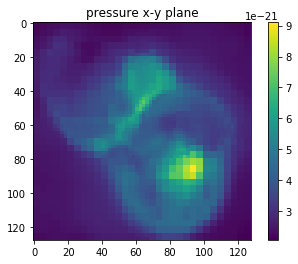

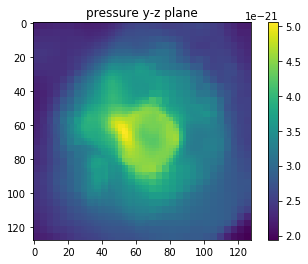

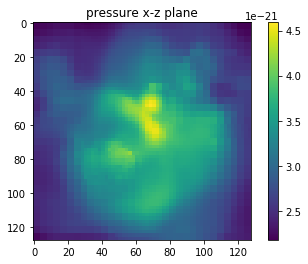

In [111]:
density = list(f["density"])
dxy=np.zeros((128,128))
dyz=np.zeros((128,128))
dxz=np.zeros((128,128))

for i in range (len(density)):
    for j in range (len(density)):
        dxy[i][j] = density[i][j][0]
for i in range (len(density)):
    for j in range (len(density)):
        dyz[i][j] = density[0][i][j]
for i in range (len(density)):
    for j in range (len(density)):
        dxz[i][j] = density[i][0][j]
        
        

temperature = list(f["temperature"])
txy=np.zeros((128,128))
tyz=np.zeros((128,128))
txz=np.zeros((128,128))


#plt.hist2d(x, y, bins=40)
for i in range (len(temperature)):
    for j in range (len(temperature)):
        txy[i][j] = temperature[i][j][0]
for i in range (len(temperature)):
    for j in range (len(temperature)):
        tyz[i][j] = temperature[0][i][j]
for i in range (len(temperature)):
    for j in range (len(temperature)):
        txz[i][j] = temperature[i][0][j]
new_xy = np.zeros((128,128))
new_yz = np.zeros((128,128))
new_xz = np.zeros((128,128))
for i in range (128):
    for j in range (128):
        new_xy[i][j] = txy[i][j]*dxy[i][j]
        new_yz[i][j] = tyz[i][j]*dyz[i][j]
        new_xz[i][j] = txz[i][j]*dxz[i][j]

plt.title("pressure x-y plane")
plt.imshow(new_xy)
plt.colorbar()
plt.show()

plt.title("pressure y-z plane")
plt.imshow(new_yz)
plt.colorbar()
plt.show()

plt.title("pressure x-z plane")
plt.imshow(new_xz)
plt.colorbar()
plt.show()





---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 5".
---

## Part 6: Visualizing the data with the specialized package, `yt` (6 points)

The simulation data that you've been working with was extracted from an [`Enzo`](http://enzo-project.org/) simulation. About 8 years ago, there wasn't a great option for working with the complex three-dimensional data that `Enzo` created, so Matthew Turk (now at the University of Illinois) took it upon himself to create a new Python package that made analyzing Enzo data much simpler and [`yt`](http://yt-project.org/) was born! In fact, all of the data you've been working with was processed in one way or another with `yt`.

This is the part of the assignment where you will use "some_more_data.h5". This is a more complex dataset of the same region of the simulation. This data is formatted such that `yt` is able to load in and interact with the data relatively easily. You'll be using `yt` to reproduce some of the same visualizations and appreciate why a specialized package like `yt` might be a better tool to use for analyzing this data than just matplotlib.

The documentation of the stable version of `yt` is here: http://yt-project.org/doc/. The "Cookbook" is a particularly useful section of the documention for learning how to use `yt`.

For this part of the assignment your job is to:

1. Install the yt analysis package
2. Load "some_more_data.h5" using `yt`
3. Make a "`SlicePlot`" of "density" through the center of the data using `yt`.
4. Make a "`ProjectionPlot`" of "density" weighted by "density" through the center of the data using `yt`. This can be a particularly useful way of looking at 3D data because it integrates the chosen field along the line of sight to "project" the data into a 2D plane while still giving you some sense of the 3D structure of the gas. 
5. Make at least one of each of the following `yt` plots using fields of your choosing:
    - A "PhasePlot"
    - A volume rendering
6. Save your favorite plot and commit it to your repository.

Your `ProjectionPlot` should end up looking something like this:
<img src="https://i.imgur.com/DKAdMd4.png" width=400px>

Note that the orientiation of the disk galaxy is different than before. This is because of the extra information encoded in the larger data file that allows yt to orient the dataset to match that of the original simulation.

**Important note**: You might get an error, "RecursionError: maximum recursion depth exceeded." If this happens, it's actually because there is a conflict between `yt` and the newest version of NumPy, which was released quite recently. This is actually something that happens from time to time when you're working with open source Python packages. Luckily, there is normally a solution to get things working again!

To fix this issue, you should roll back your NumPy installation by one version. To do this, run the following command:

`pip install numpy==1.13`

**After you do that**, make sure you restart your jupyter notebook kernel and re-execute this cell so that the new version of NumPy gets imported.

In [5]:
# Put your code here


---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 6".
---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [6]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/MhrbmS1n3oObhp6x1" 
	width="80%" 
	height="800px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congrats, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #3, and upload it there.